In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [5]:
# Load the dataset
file_path = 'Customer_Data.csv'
data = pd.read_csv(file_path)
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Data preprocessing and feature engineering

In [7]:
# Step 1: Handle Missing Values
# Fill CREDIT_LIMIT with median value
credit_limit_imputer = SimpleImputer(strategy='median')
data['CREDIT_LIMIT'] = credit_limit_imputer.fit_transform(data[['CREDIT_LIMIT']])
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [9]:
# Step 1: Identify Missing Values
missing_values = data.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [11]:
# Step 2: Handle Missing Values
# Fill CREDIT_LIMIT with median value
credit_limit_imputer = SimpleImputer(strategy='median')
data['CREDIT_LIMIT'] = credit_limit_imputer.fit_transform(data[['CREDIT_LIMIT']])

In [13]:
# Fill MINIMUM_PAYMENTS with median value
min_payments_imputer = SimpleImputer(strategy='median')
data['MINIMUM_PAYMENTS'] = min_payments_imputer.fit_transform(data[['MINIMUM_PAYMENTS']])

In [15]:
missing_values = data.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


In [17]:
# Step 3: Drop Irrelevant Columns
data = data.drop(columns=['CUST_ID'])

In [19]:
# Step 4: Feature Engineering
# Create new features
data['TOTAL_PURCHASES'] = data['ONEOFF_PURCHASES'] + data['INSTALLMENTS_PURCHASES']
data['TOTAL_FREQUENCY'] = data['PURCHASES_FREQUENCY'] + data['CASH_ADVANCE_FREQUENCY']
data['PURCHASE_RATIO'] = data['PURCHASES'] / (data['BALANCE'] + 1e-9)  # Avoid division by zero
data['CASH_ADVANCE_RATIO'] = data['CASH_ADVANCE'] / (data['BALANCE'] + 1e-9)  # Avoid division by zero

In [21]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,TOTAL_PURCHASES,TOTAL_FREQUENCY,PURCHASE_RATIO,CASH_ADVANCE_RATIO
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,2,1000.0,201.802084,139.509787,0.000000,12,95.40,0.166667,2.332476,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,0,7000.0,4103.032597,1072.340217,0.222222,12,0.00,0.250000,0.000000,2.011869
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,12,7500.0,622.066742,627.284787,0.000000,12,773.17,1.000000,0.309869,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,1,7500.0,0.000000,312.343947,0.000000,12,1499.00,0.166666,0.899398,0.123473
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,1,1200.0,678.334763,244.791237,0.000000,12,16.00,0.083333,0.019567,0.000000


In [23]:
# Step 5: Scale the Features
scaler = StandardScaler()
scaled_columns = data.columns
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=scaled_columns)


In [25]:
# Save the final dataset to CSV
data_scaled.to_csv('Customer_Data_Processed.csv', index=False)

### Modeling and evaluation

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler

In [40]:
# Load the preprocessed dataset
file_path = 'Customer_Data_Processed.csv'
data = pd.read_csv(file_path)
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,TOTAL_PURCHASES,TOTAL_FREQUENCY,PURCHASE_RATIO,CASH_ADVANCE_RATIO
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,...,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068,-0.425020,-1.178520,-0.054413,-0.026707
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,...,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068,-0.469670,-0.964475,-0.054413,-0.026707
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,...,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068,-0.107804,0.961933,-0.054413,-0.026707
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,...,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068,0.231906,-1.178522,-0.054413,-0.026707
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,...,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068,-0.462181,-1.392567,-0.054413,-0.026707


In [91]:
# Step 1: Perform K-Means Clustering
k = 3  # Set the number of clusters (based on earlier analysis)
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data)
labels = kmeans.labels_

In [93]:
# Step 2: Add Cluster Labels to the Dataset
data['Cluster'] = labels

In [95]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,TOTAL_PURCHASES,TOTAL_FREQUENCY,PURCHASE_RATIO,CASH_ADVANCE_RATIO,Cluster
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,...,-0.960378,-0.528979,-0.302400,-0.525551,0.36068,-0.425020,-1.178520,-0.054413,-0.026707,1
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,...,0.688678,0.818642,0.097500,0.234227,0.36068,-0.469670,-0.964475,-0.054413,-0.026707,1
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,...,0.826100,-0.383805,-0.093293,-0.525551,0.36068,-0.107804,0.961933,-0.054413,-0.026707,2
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,...,0.826100,-0.598688,-0.228307,-0.525551,0.36068,0.231906,-1.178522,-0.054413,-0.026707,1
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,...,-0.905410,-0.364368,-0.257266,-0.525551,0.36068,-0.462181,-1.392567,-0.054413,-0.026707,1


In [97]:
# Step 1: Perform K-Means Clustering
k = 4  # Set the number of clusters (based on earlier analysis)
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data)
labels = kmeans.labels_

In [99]:
# Step 2: Add Cluster Labels to the Dataset
data['Cluster'] = labels

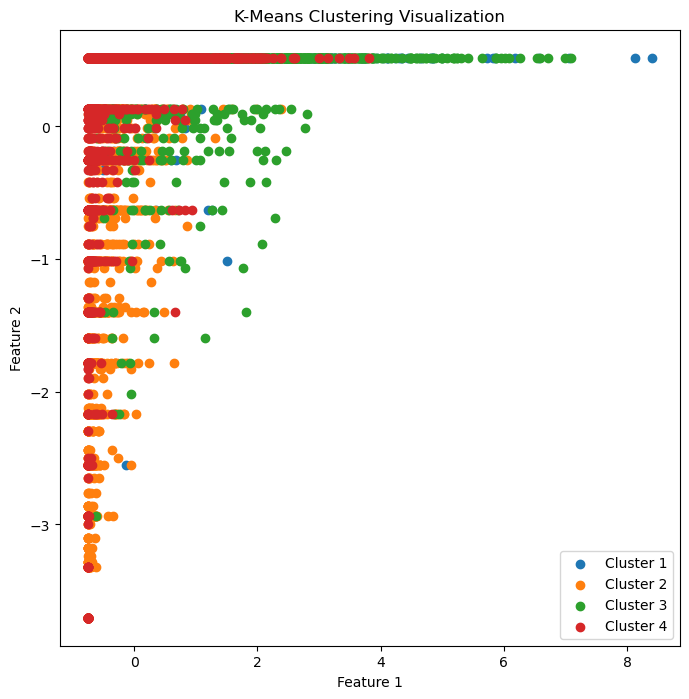

In [101]:
# Step 3: Visualize Clusters (using two selected features)
plt.figure(figsize=(8, 8))
for cluster in range(k):
    cluster_points = data[data['Cluster'] == cluster]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], label=f'Cluster {cluster + 1}')
plt.title("K-Means Clustering Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

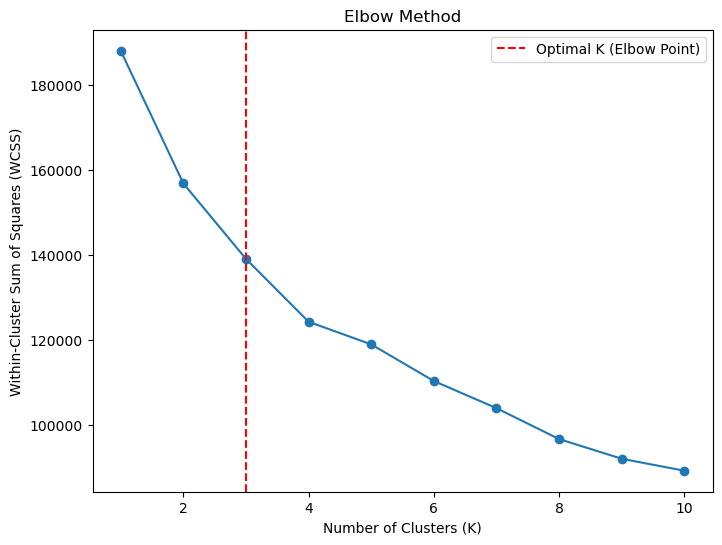

In [105]:
# Step 4: Evaluation using the Elbow Method
wcss = []
k_values = range(1, 11)
for k in k_values:
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    kmeans_temp.fit(data.drop(columns=['Cluster']))
    wcss.append(kmeans_temp.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.axvline(x=3, color='red', linestyle='--', label='Optimal K (Elbow Point)')
plt.legend()
plt.show()


In [107]:
# Step 5: Evaluation using Silhouette Score
silhouette_avg = silhouette_score(data.drop(columns=['Cluster']), labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.23


In [109]:
# Step 6: Evaluation using Davies-Bouldin Index (DBI)
dbi_score = davies_bouldin_score(data.drop(columns=['Cluster']), labels)
print(f"Davies-Bouldin Index: {dbi_score:.2f}")

Davies-Bouldin Index: 1.48


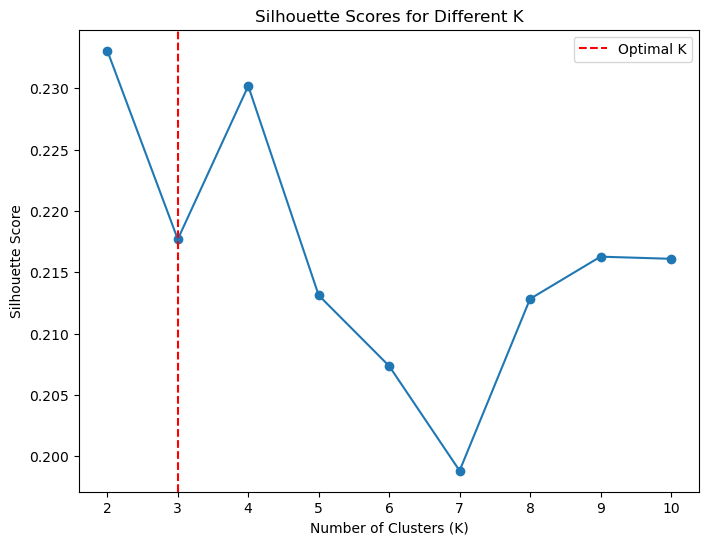

In [113]:
# Step 7: Visualizing Silhouette Scores for each K
silhouette_scores = []
for k in range(2, 11):
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans_temp.fit_predict(data.drop(columns=['Cluster']))
    silhouette_scores.append(silhouette_score(data.drop(columns=['Cluster']), cluster_labels))

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.axvline(x=3, color='red', linestyle='--', label='Optimal K')
plt.legend()
plt.show()


In [115]:
# Save the clustered dataset to CSV
data.to_csv('Customer_Data_Clustered.csv', index=False)

### Performace improvement using K-Means ++

In [57]:
# Step 1: Perform K-Means Clustering with K-Means++ Initialization
k = 4  # Set the number of clusters (based on earlier analysis)
kmeans_plus = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans_plus.fit(data)
labels_plus = kmeans_plus.labels_

In [117]:
# Load the preprocessed dataset
file_path = 'Customer_Data_Processed.csv'
data = pd.read_csv(file_path)

In [119]:
# Step 2: Add Cluster Labels to the Dataset
data['Cluster'] = labels_plus

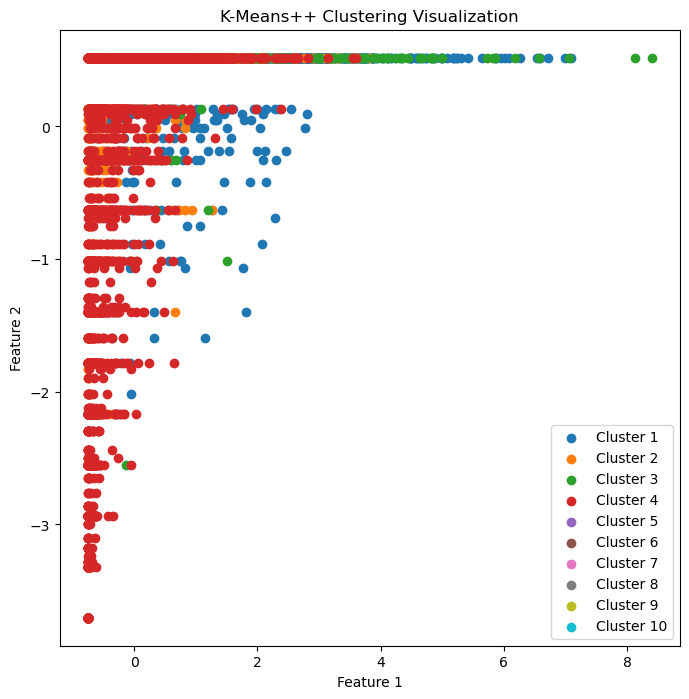

In [121]:
# Step 3: Visualize Clusters (using two selected features)
plt.figure(figsize=(8, 8))
for cluster in range(k):
    cluster_points = data[data['Cluster'] == cluster]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], label=f'Cluster {cluster + 1}')
plt.title("K-Means++ Clustering Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

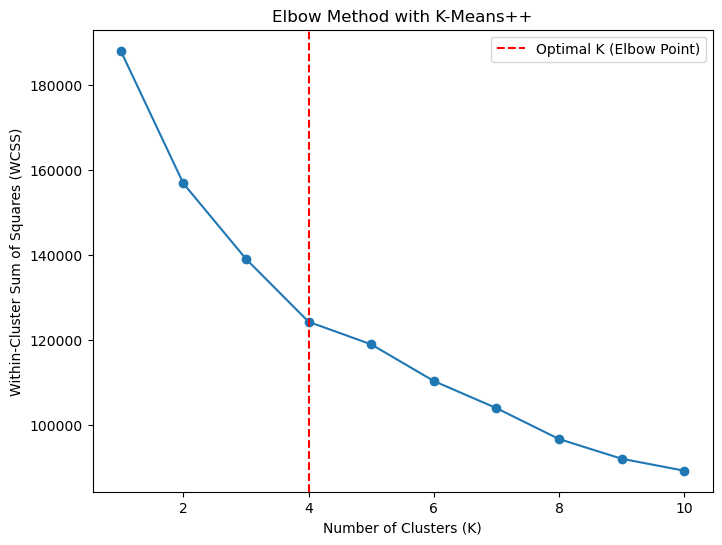

In [123]:
# Step 4: Evaluation using the Elbow Method
wcss_plus = []
k_values = range(1, 11)
for k in k_values:
    kmeans_temp_plus = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans_temp_plus.fit(data.drop(columns=['Cluster']))
    wcss_plus.append(kmeans_temp_plus.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss_plus, marker='o')
plt.title("Elbow Method with K-Means++")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.axvline(x=4, color='red', linestyle='--', label='Optimal K (Elbow Point)')
plt.legend()
plt.show()

In [125]:
# Step 5: Evaluation using Silhouette Score
silhouette_avg_plus = silhouette_score(data.drop(columns=['Cluster']), labels_plus)
print(f"Silhouette Score with K-Means++: {silhouette_avg_plus:.2f}")


Silhouette Score with K-Means++: 0.23


In [127]:
# Step 6: Evaluation using Davies-Bouldin Index (DBI)
dbi_score_plus = davies_bouldin_score(data.drop(columns=['Cluster']), labels_plus)
print(f"Davies-Bouldin Index with K-Means++: {dbi_score_plus:.2f}")

Davies-Bouldin Index with K-Means++: 1.44
